<a href="https://colab.research.google.com/github/mellalbuquerque/fashiondata/blob/main/fashion_retail_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **primeiros passos**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Fashion_Retail_Sales.csv')

In [3]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [4]:
df.shape

(3400, 6)

In [5]:
print(df.dtypes)

Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object


In [6]:
# transformando a coluna em formato de data
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

In [7]:
print(df.dtypes)

Customer Reference ID             int64
Item Purchased                   object
Purchase Amount (USD)           float64
Date Purchase            datetime64[ns]
Review Rating                   float64
Payment Method                   object
dtype: object


In [8]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [9]:
print(df.columns)

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')


# **analisando os dados**

número de compras por mês

In [11]:
df['Year-Month'] = df['Date Purchase'].dt.to_period('M')

compras_mensais = df.groupby('Year-Month')['Customer Reference ID'].count()
print(compras_mensais)


Year-Month
2022-10    309
2022-11    238
2022-12    306
2023-01    292
2023-02    251
2023-03    277
2023-04    295
2023-05    308
2023-06    262
2023-07    303
2023-08    301
2023-09    253
2023-10      5
Freq: M, Name: Customer Reference ID, dtype: int64


evolução das compras ao longo do tempo

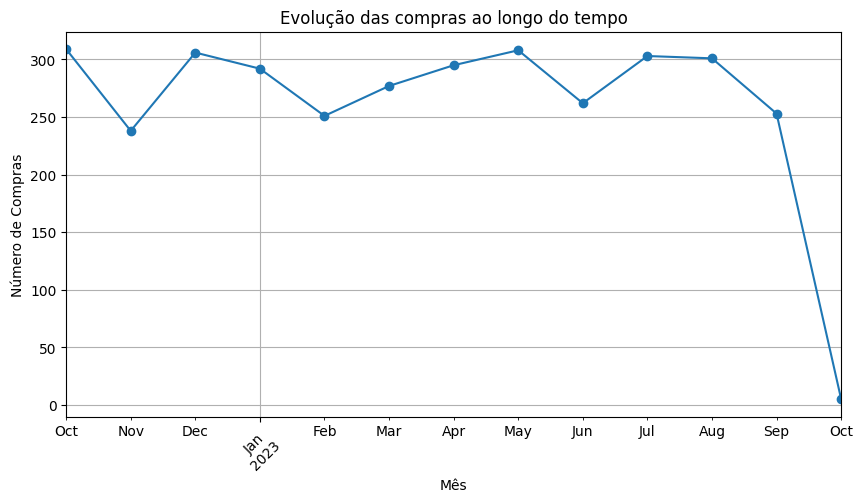

In [14]:
compras_mensais.plot(kind='line', marker='o', figsize=(10, 5))
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.title('Evolução das compras ao longo do tempo')
plt.xticks(rotation=45)
plt.grid()
plt.show()


receita total por mês

In [15]:
receita_mensal = df.groupby('Year-Month')['Purchase Amount (USD)'].sum()
print(receita_mensal)


Year-Month
2022-10    30812.0
2022-11    35129.0
2022-12    46851.0
2023-01    29887.0
2023-02    33879.0
2023-03    39380.0
2023-04    40220.0
2023-05    45352.0
2023-06    35542.0
2023-07    33176.0
2023-08    35809.0
2023-09    24492.0
2023-10      423.0
Freq: M, Name: Purchase Amount (USD), dtype: float64


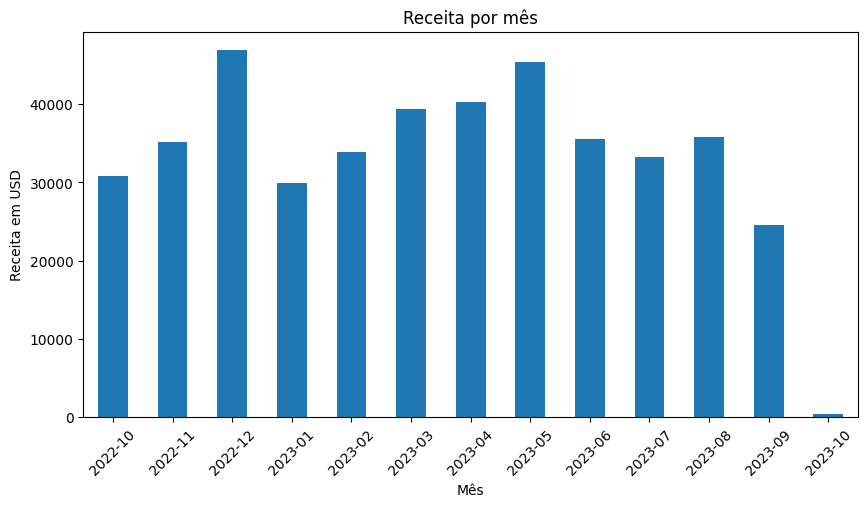

In [17]:
receita_mensal.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Mês')
plt.ylabel('Receita em USD')
plt.title('Receita por mês')
plt.xticks(rotation=45)
plt.show()


segmentação por método de pagamento

In [18]:
df['Payment Method'].value_counts()


,count
Payment Method,
Credit Card,1770
Cash,1630


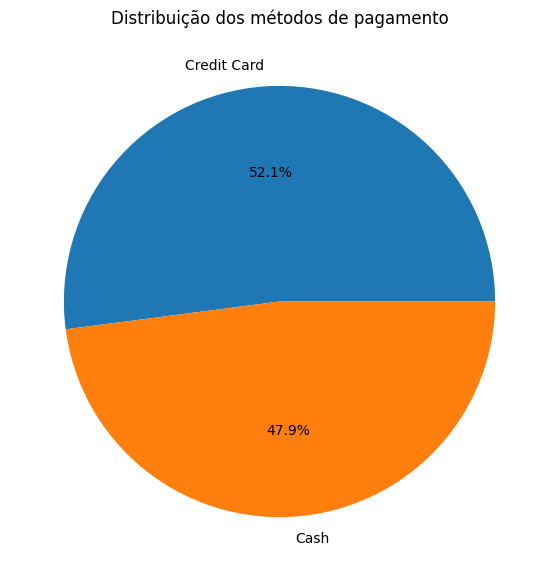

In [20]:
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Distribuição dos métodos de pagamento')
plt.ylabel('')
plt.show()


Média de avaliação por item comprado

In [21]:
df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False)


,Review Rating
Item Purchased,
Sun Hat,3.493333
Flip-Flops,3.302128
Jeans,3.263462
Sandals,3.262000
Boots,3.224138
Scarf,3.203279
Jumpsuit,3.202041
Skirt,3.196296
Wallet,3.188060


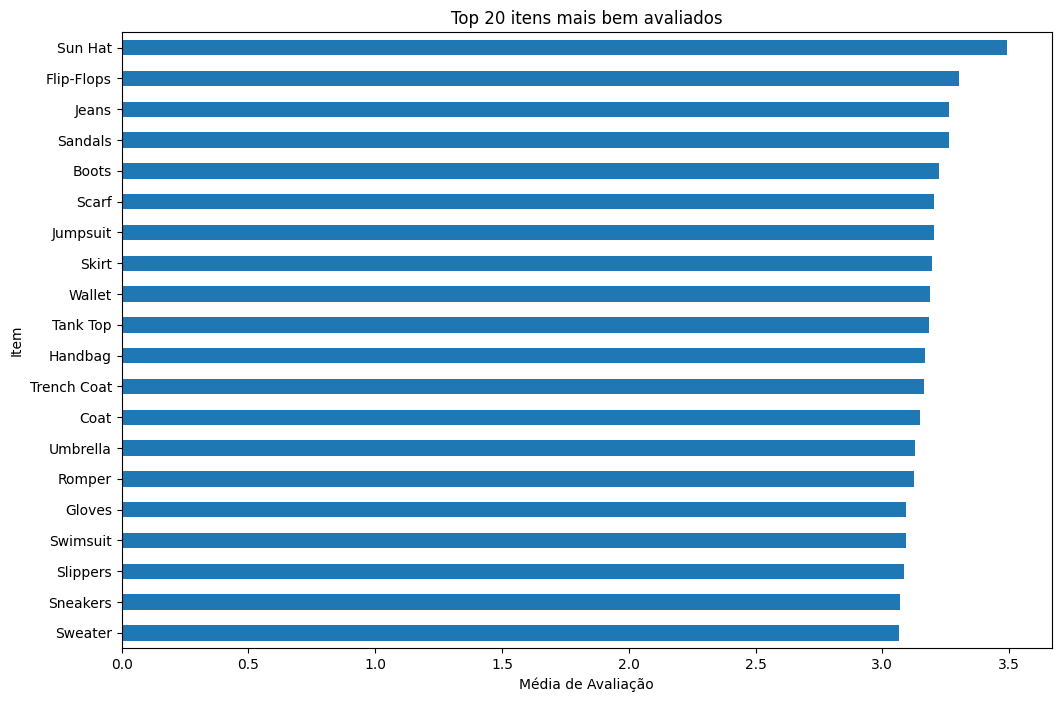

In [38]:
df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=True).tail(20).plot(
    kind='barh', figsize=(12, 8)
)
plt.xlabel('Média de Avaliação')
plt.ylabel('Item')
plt.title('Top 20 itens mais bem avaliados')
plt.show()


clientes que mais compram

In [30]:
df['Customer Reference ID'].value_counts().head(10)


,count
Customer Reference ID,
4078,34
4122,32
4034,32
4065,29
3973,29
4070,28
4075,28
4082,28
3970,27


clientes que gastaram mais

In [31]:
df.groupby('Customer Reference ID')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)


,Purchase Amount (USD)
Customer Reference ID,
4109,9685.0
4040,9657.0
4044,8745.0
4075,7416.0
4108,6864.0
4067,6528.0
4010,6513.0
4103,6375.0
3984,6327.0


tempo médio entre compras

In [32]:
df = df.sort_values(['Customer Reference ID', 'Date Purchase'])
df['Time Between Purchases'] = df.groupby('Customer Reference ID')['Date Purchase'].diff()

tempo_medio = df['Time Between Purchases'].mean()
print(f"Tempo médio entre compras: {tempo_medio}")


Tempo médio entre compras: 16 days 22:52:45.862708719


compras acima de $100

In [34]:
compras_grandes = df[df['Purchase Amount (USD)'] > 100]
compras_grandes

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Year-Month,Time Between Purchases
46,3957,Camisole,147.0,2022-11-04,4.7,Cash,2022-11,28 days
1641,3957,Blouse,183.0,2023-03-09,2.1,Credit Card,2023-03,35 days
727,3957,Vest,180.0,2023-05-17,3.6,Cash,2023-05,1 days
2702,3957,Backpack,157.0,2023-06-02,5.0,Cash,2023-06,15 days
387,3957,Sneakers,172.0,2023-07-08,NaN,Credit Card,2023-07,36 days
...,...,...,...,...,...,...,...,...
1492,4122,Camisole,120.0,2023-08-06,4.2,Cash,2023-08,3 days
821,4122,Pajamas,154.0,2023-08-14,1.8,Credit Card,2023-08,1 days
2986,4122,Gloves,150.0,2023-08-29,NaN,Credit Card,2023-08,10 days
1898,4122,Romper,109.0,2023-09-02,5.0,Cash,2023-09,4 days


compras com satisfação abaixo de 3

In [36]:
compras_mal_avaliadas = df[df['Review Rating'] < 3]
compras_mal_avaliadas

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Year-Month,Time Between Purchases
379,3957,Tank Top,40.0,2022-10-03,2.1,Cash,2022-10,NaT
1009,3957,Coat,90.0,2022-10-07,2.1,Credit Card,2022-10,4 days
2571,3957,Vest,98.0,2023-02-02,2.8,Cash,2023-02,7 days
1641,3957,Blouse,183.0,2023-03-09,2.1,Credit Card,2023-03,35 days
76,3957,Gloves,NaN,2023-05-16,2.7,Cash,2023-05,68 days
...,...,...,...,...,...,...,...,...
1934,4122,Jumpsuit,42.0,2023-04-19,2.1,Cash,2023-04,30 days
900,4122,Sweater,117.0,2023-05-19,2.6,Credit Card,2023-05,3 days
757,4122,Blouse,NaN,2023-07-04,2.9,Credit Card,2023-07,7 days
2085,4122,Socks,99.0,2023-08-03,1.5,Cash,2023-08,6 days


**análise de frequência de compras por cliente**

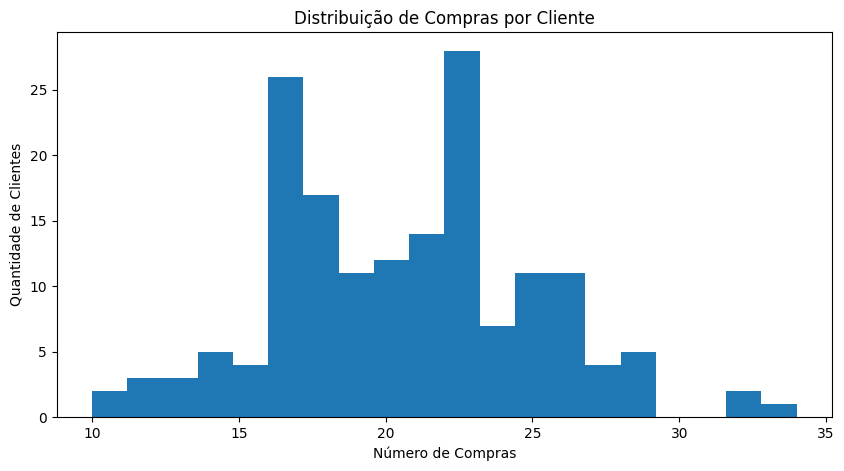

In [39]:
df['Customer Reference ID'].value_counts().plot(kind='hist', bins=20, figsize=(10,5))
plt.xlabel('Número de Compras')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição de Compras por Cliente')
plt.show()


Isso mostra se a maioria dos clientes compra uma única vez ou se há clientes recorrentes.

**ticket médio por cliente**

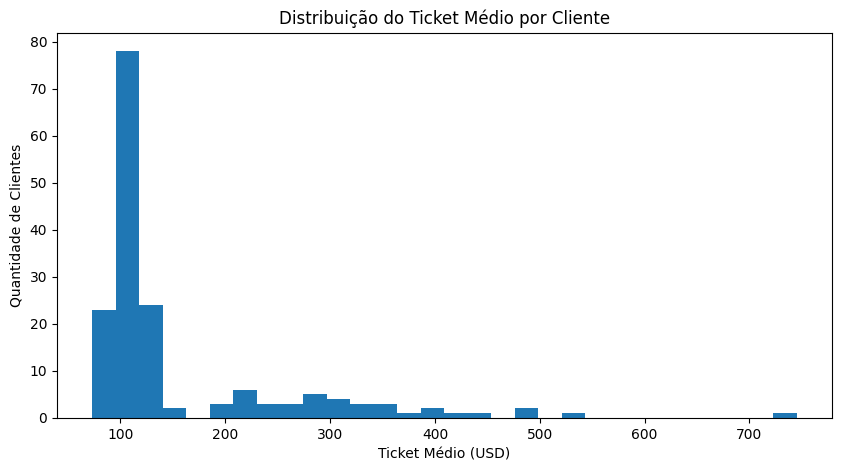

In [40]:
ticket_medio = df.groupby('Customer Reference ID')['Purchase Amount (USD)'].mean()
ticket_medio.plot(kind='hist', bins=30, figsize=(10,5))
plt.xlabel('Ticket Médio (USD)')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição do Ticket Médio por Cliente')
plt.show()


melhor dia da semana

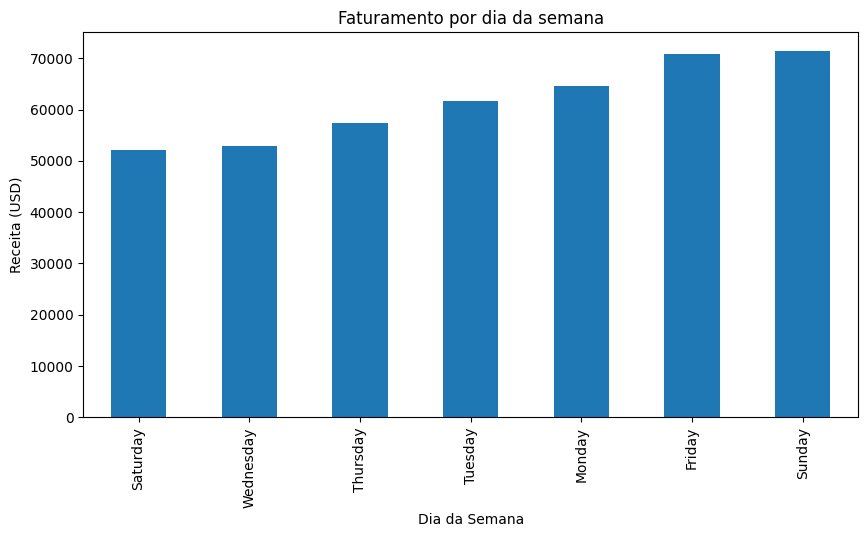

In [42]:
df['Weekday'] = df['Date Purchase'].dt.day_name()
df.groupby('Weekday')['Purchase Amount (USD)'].sum().sort_values().plot(kind='bar', figsize=(10,5))
plt.xlabel('Dia da Semana')
plt.ylabel('Receita (USD)')
plt.title('Faturamento por dia da semana')
plt.show()


itens mais comprados

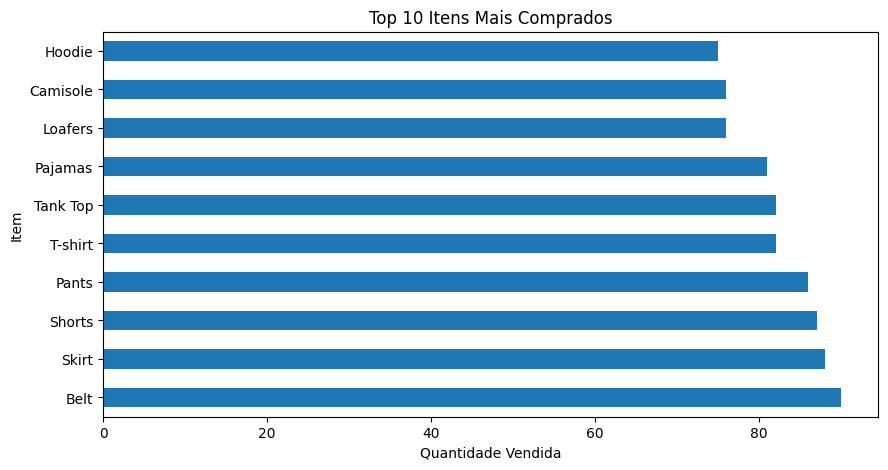

In [43]:
df['Item Purchased'].value_counts().head(10).plot(kind='barh', figsize=(10,5))
plt.xlabel('Quantidade Vendida')
plt.ylabel('Item')
plt.title('Top 10 Itens Mais Comprados')
plt.show()


**análise de métodos de pagamento x valor da compra**

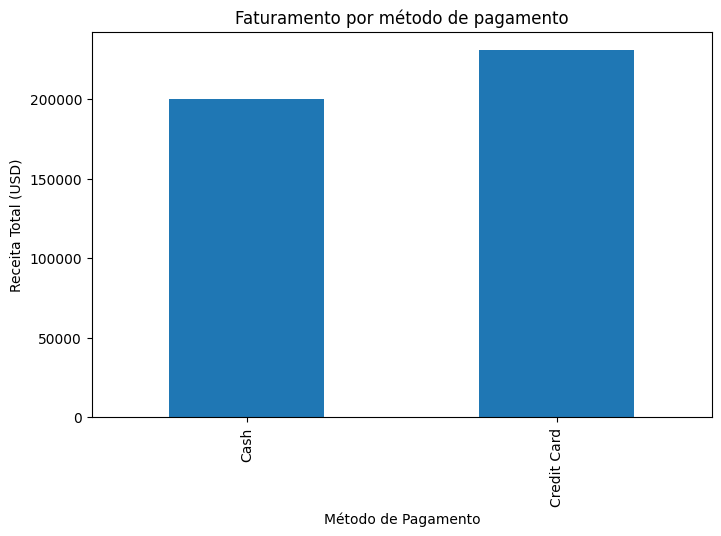

In [45]:
df.groupby('Payment Method')['Purchase Amount (USD)'].sum().plot(kind='bar', figsize=(8,5))
plt.xlabel('Método de Pagamento')
plt.ylabel('Receita Total (USD)')
plt.title('Faturamento por método de pagamento')
plt.show()


clientes recorrentes vs. clientes únicos

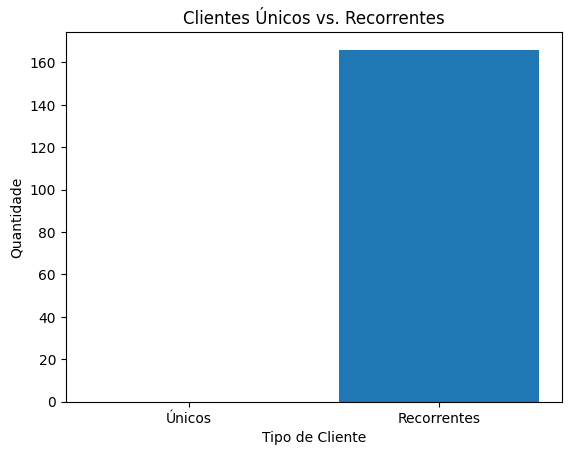

In [46]:
clientes_frequencia = df['Customer Reference ID'].value_counts()
clientes_unicos = (clientes_frequencia == 1).sum()
clientes_recorrentes = (clientes_frequencia > 1).sum()

plt.bar(['Únicos', 'Recorrentes'], [clientes_unicos, clientes_recorrentes])
plt.xlabel('Tipo de Cliente')
plt.ylabel('Quantidade')
plt.title('Clientes Únicos vs. Recorrentes')
plt.show()


taxa de recompra

In [48]:
taxa_recompra = (clientes_recorrentes / len(df['Customer Reference ID'].unique())) * 100
print(f"Taxa de recompra: {taxa_recompra:.2f}%")


Taxa de recompra: 100.00%


In [49]:
print(df.columns)

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method', 'Year-Month',
       'Time Between Purchases', 'Weekday'],
      dtype='object')


# **clustering**

Tabela RFM:
                       Recency  Frequency  Monetary
Customer Reference ID                              
3957                       176         14    1150.0
3958                       108         20    1334.0
3959                       119         22    2047.0
3960                       108         18    1434.0
3961                       124         22    1811.0


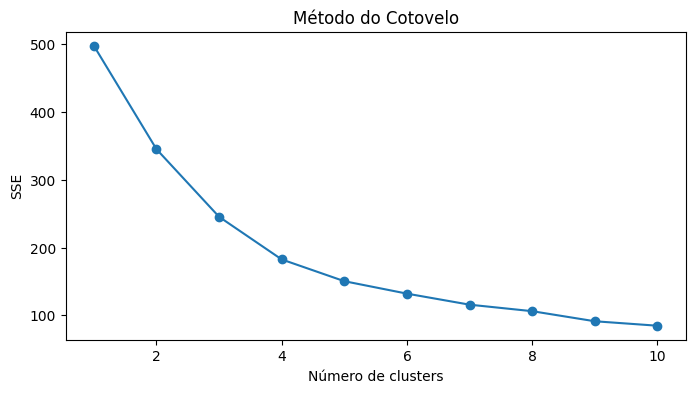


Tabela RFM com clusters:
                       Recency  Frequency  Monetary  Cluster
Customer Reference ID                                       
3957                       176         14    1150.0        2
3958                       108         20    1334.0        1
3959                       119         22    2047.0        1
3960                       108         18    1434.0        2
3961                       124         22    1811.0        1


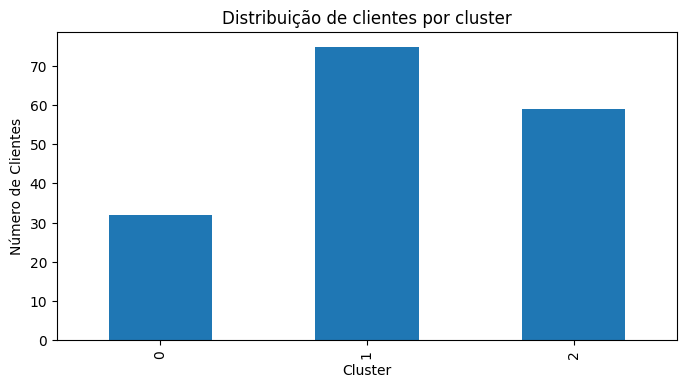

In [52]:
# definindo uma data de referência
data_referencia = pd.to_datetime('2023-12-31')

# criando a tabela RFM
rfm = df.groupby('Customer Reference ID').agg({
    'Date Purchase': lambda x: (data_referencia - x.max()).days,  # recência
    'Customer Reference ID': 'count',                             # frequência
    'Purchase Amount (USD)': 'sum'                                # valor monetário
}).rename(columns={
    'Date Purchase': 'Recency',
    'Customer Reference ID': 'Frequency',
    'Purchase Amount (USD)': 'Monetary'
})

print("Tabela RFM:")
print(rfm.head())

# normalizando os dados para o clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# determinando o número ideal de clusters usando o método do cotovelo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método do Cotovelo')
plt.show()

# com base no gráfico do cotovelo, escolhendo um número adequado de clusters (exemplo: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print("\nTabela RFM com clusters:")
print(rfm.head())

# visualizando a distribuição dos clusters
plt.figure(figsize=(8, 4))
rfm['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de clientes por cluster')
plt.show()
